#Homework 10: Time Series

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.graphics as smg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, font_scale=1.3)

In [2]:
import warnings
warnings.filterwarnings('ignore', lineno=590)
warnings.filterwarnings('ignore', lineno=403)

In [17]:
df_gas = pd.read_csv('gasoline.csv', parse_dates=True, index_col=0)
df_google = pd.read_csv('googletrends_b.csv', parse_dates=True, index_col=0)

#df_gas = df_gas.to_period("B")

In [34]:
df_gas.head()

,Regular,Midgrade,Premium,Diesel
Date,,,,
1994-11-28,1.105,1.197,1.303,1.126
1994-12-05,1.103,1.197,1.301,1.123
1994-12-12,1.095,1.188,1.288,1.114
1994-12-19,1.087,1.179,1.279,1.109
1994-12-26,1.077,1.171,1.270,1.106


In [46]:
df_google.head()

,suv,truck,scrap metal,best mpg
Week,,,,
2005-02-13,45,74,37,22
2005-02-20,47,70,46,19
2005-02-27,42,66,27,19
2005-03-06,46,66,24,19
2005-03-13,45,69,36,22


#Question 2: Data Manipulation and Visualization

Use proper Series or DataFrame slicing, or pandas functions, to obtain the following results.

#2 (a)

Regular gasoline price on Oct 19, 2015.

In [21]:
df_gas.Regular.ix['2015-10-19']

2.2769999999999997

#2 (b)

Diesel prices from Mar 18 to Apr 8, 2013.

In [23]:
#df_gas['03/18/2013':'04/08/2013']
df_gas['2013-03-18':'2013-04-08']

,Regular,Midgrade,Premium,Diesel
Date,,,,
2013-03-18,3.696,3.850,4.002,4.047
2013-03-25,3.680,3.828,3.981,4.006
2013-04-01,3.645,3.798,3.953,3.993
2013-04-08,3.608,3.761,3.916,3.977


#2 (c)

Midgrade gasoline price as of Oct 21, 2015. This date does not appear in the dataset, so you will need to fetch the last reported price as of that date. Hint: use asof()

In [24]:
df_gas.Midgrade.asof('2015-10-21')

2.5049999999999999

#2 (d)


Percent change of midgrade gas price on Oct 19, 2015 from the last day. Hint: use pct_change().

In [35]:
df_gas.Midgrade['2015-10-12':'2015-10-19'].pct_change()

Date
2015-10-12         NaN
2015-10-19   -0.021866
Name: Midgrade, dtype: float64

#2 (e)

Visualize the monthly average prices of all grades (including diesel) between Jan 2007 and Dec 2009. You should obtain a figure like the one below. Hint: since the original data records are based on weeks, in order to compute monthly average, you will need to perform downsampling. You can achieve this by using resample().

In [36]:
# Average price per month
df_gas.resample('M', how='mean').head()

,Regular,Midgrade,Premium,Diesel
Date,,,,
1994-11-30,1.1050,1.19700,1.30300,1.12600
1994-12-31,1.0905,1.18375,1.28450,1.11300
1995-01-31,1.0818,1.17360,1.27480,1.09820
1995-02-28,1.0725,1.16475,1.26475,1.08775
1995-03-31,1.0720,1.16125,1.25800,1.08750


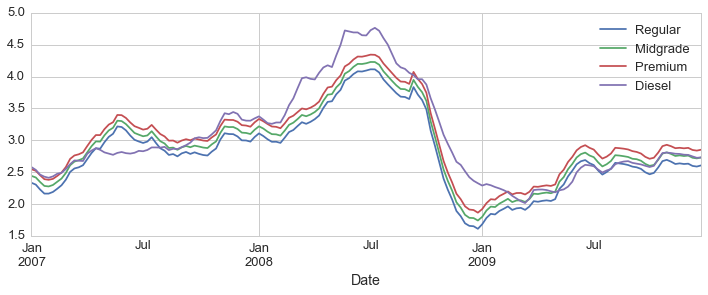

In [38]:
fig, ax = plt.subplots(figsize=(12,4))
df_gas.ix['2007':'2009',['Regular','Midgrade','Premium', 'Diesel']].plot(ax=ax)

#2 (f)

Visualize the weekly change rate of regular gasoline price between Jan 2007 and Dec 2009. You should obtain a figure like the one below. Hint: use pct_change().

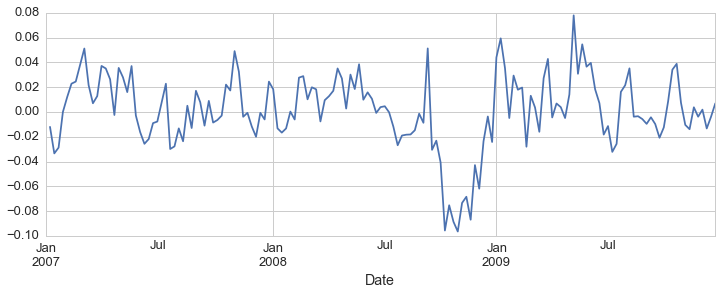

In [44]:
fig, ax = plt.subplots(figsize=(12,4))
df_gas.Regular['2007-01-01':'2009-12-31'].pct_change().plot(ax=ax)

#Question 3: Seasonal Decomposition and Detrending

In [49]:
df_gas_filtered = df_gas['1994':'2015']
df_google_filtered = df_google['2005':'2015']

ts_regular = df_gas_filtered.Regular
ts_truck = df_google_filtered.truck

#3 (a)

Perform seasonal decomposition of regular gasoline price. Visualize your results. Hint: use sm.tsa.seasonal_decompose().

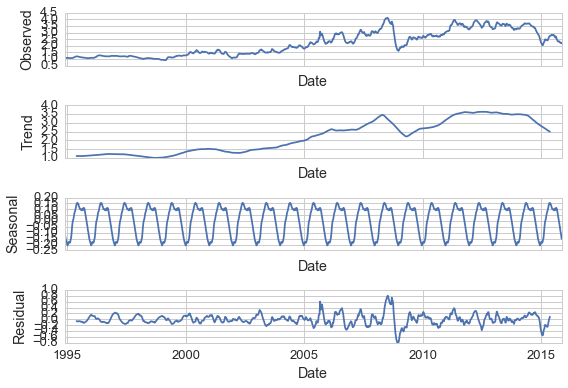

In [65]:
# decompose time series of Regular
decompose_result = sm.tsa.seasonal_decompose(ts_regular)
_ = decompose_result.plot()

#3 (b)

Perform seasonal decomposition of the "truck" query popularity. Visualize your results.

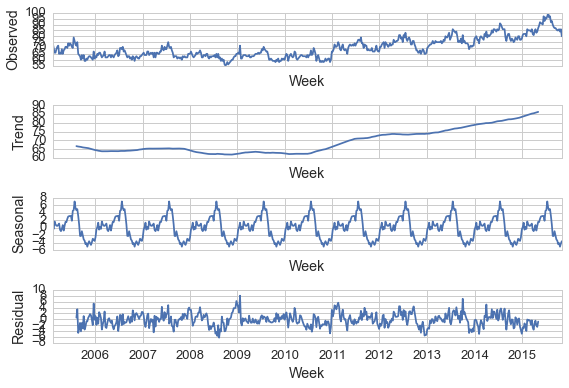

In [52]:
# decompose time series of truck
decompose_result = sm.tsa.seasonal_decompose(ts_truck)
_ = decompose_result.plot()

#3 (c)

Plot the detrended time series of regular gasoline price. Hint: use sm.tsa.tsatools.detrend().

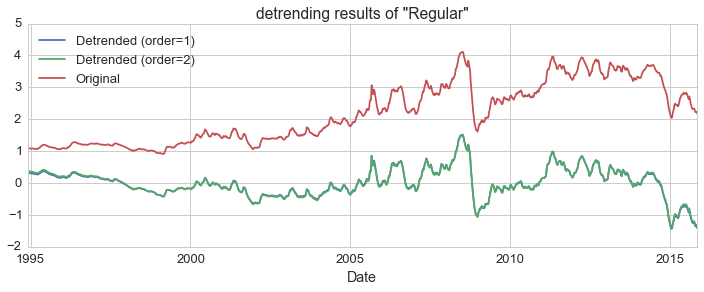

In [56]:
cols = [sm.tsa.tsatools.detrend(ts_regular, order) for order in range(1,3)]
cols.append(ts_regular.values)
df_reg = pd.DataFrame(np.array(cols).T, 
                         columns=['Detrended (order=1)',
                                  'Detrended (order=2)',
                                  'Original'],
                         index=ts_regular.index)
df_reg.head()

# Plot the detrended results
fig, ax = plt.subplots(figsize=(12,4))
df_reg.plot(ax=ax)
plt.title('detrending results of "Regular"')

#3 (d)

Plot the detrended time series of the "truck" query popularity.

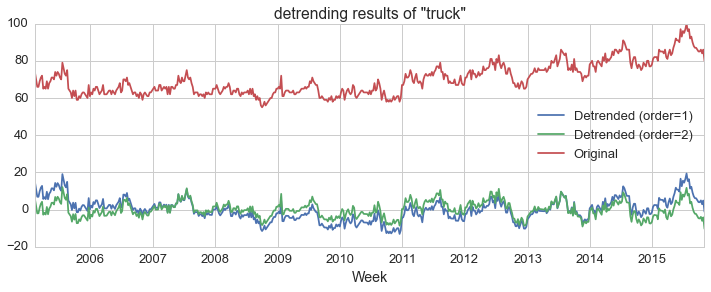

In [59]:
cols = [sm.tsa.tsatools.detrend(ts_truck, order) for order in range(1,3)]
cols.append(ts_truck.values)
df_truck = pd.DataFrame(np.array(cols).T, 
                         columns=['Detrended (order=1)',
                                  'Detrended (order=2)',
                                  'Original'],
                         index=ts_truck.index)
df_truck.head()

# Plot the detrended results
fig, ax = plt.subplots(figsize=(12,4))
df_truck.plot(ax=ax)
plt.title('detrending results of "truck"')

#Question 4: Correlations

#4 (a)

Visualize the autocorrelation function (ACF) of the "truck" query popularity. Hint: use smg.tsaplots.plot_acf(..., lags=208).

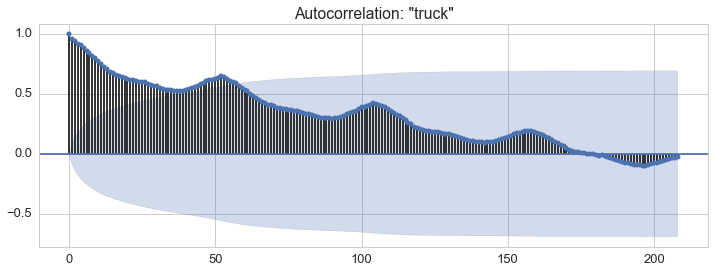

In [61]:
# Plot autocorrelation function (ACF) of the data of "truck".
fig, ax = plt.subplots(figsize=(12,4)) 
smg.tsaplots.plot_acf(ts_truck, lags=208, ax=ax)
plt.title('Autocorrelation: "truck"')

#4 (b)

What specific information does the above ACF plot tell you?

Overall the correlation decreases to 0 as the time lag increases. The correlation remains above 0 until the time lag reaches about 175.

#4 (c)

Create a DataFrame combining two datasets. You may have noticed that although both datasets are recording statistics on a weekly basis, their timestamps are off by one day. In order to properly concatenate them, we need to do some manipulation on the index. Below is one possible solution. Provide a detailed explanation to each of lines 5-8.

In [62]:
df_gas = pd.read_csv('gasoline.csv',
                     parse_dates=True, index_col=0)
df_trends = pd.read_csv('googletrends_b.csv',
                        parse_dates=True, index_col=0)
df_combined = pd.concat((df_gas, df_trends), axis=1)
df_combined = df_combined.fillna(method='ffill')
df_combined = df_combined[df_combined.index >= '2005-03-01']
df_combined = df_combined.resample('W')
df_combined.head()

,Regular,Midgrade,Premium,Diesel,suv,truck,scrap metal,best mpg
2005-03-06,1.928,2.025,2.113,2.118,46.0,66.0,24.0,19.0
2005-03-13,1.999,2.094,2.182,2.168,45.5,67.5,30.0,20.5
2005-03-20,2.056,2.151,2.241,2.194,44.5,70.0,35.0,24.0
2005-03-27,2.109,2.200,2.292,2.244,45.0,71.5,36.5,26.0
2005-04-03,2.153,2.250,2.336,2.249,45.0,68.5,37.5,26.0


Line 5: pd.concet concatenates the two dataframes df_gas and df_trends along axis 1

Line 6: .fillna(method='ffill') fills NA/NaN values using the specified method ffill, which propagates the last valid observation forward to next valid backfill

Line 7: this line sets the index of the datafram to all values greater than or equal to '2005-03-01

Line 8: .resample('W') performs downsampling on the dataset, the 'W' means weekly

#4 (d)

Normalize all the columns, so that each column has a mean of 0 and a standard deviation of 1. Hint: use sklearn.preprocessing.scale().

In [67]:
import sklearn.preprocessing as skp

df_norm = df_combined.copy()
df_norm[:] = skp.scale(df_combined, axis=0, with_mean=True, with_std=True, copy=True)
df_norm.head()

,Regular,Midgrade,Premium,Diesel,suv,truck,scrap metal,best mpg
2005-03-06,-1.818632,-1.868773,-1.912128,-1.728651,0.459261,-0.476006,-2.016020,-0.700752
2005-03-13,-1.695442,-1.750010,-1.795196,-1.652739,0.407720,-0.302538,-1.700489,-0.580402
2005-03-20,-1.596542,-1.651902,-1.695210,-1.613264,0.304640,-0.013423,-1.437546,-0.299585
2005-03-27,-1.504583,-1.567564,-1.608781,-1.537352,0.356180,0.160046,-1.358663,-0.139119
2005-04-03,-1.428240,-1.481504,-1.534215,-1.529761,0.356180,-0.186892,-1.306074,-0.139119


#4 (e)

Visualize the following four time series. Use the normalized values above.
Regular,
"scrap metal",
"best mpg",
"suv"

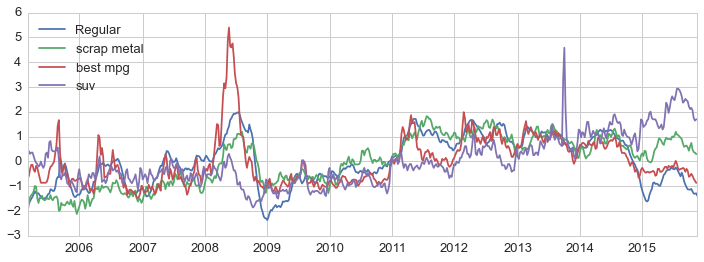

In [68]:
fig, ax = plt.subplots(figsize=(12,4))
df_norm.ix['2005':'2015',['Regular','scrap metal','best mpg', 'suv']].plot(ax=ax)

#4 (f)

Plot cross correlation function (CCF) between the following pairs of time series:
Regular vs. Diesel,
Regular vs. "scrap metal",
Regular vs. "best mpg",
Regular vs. "suv"

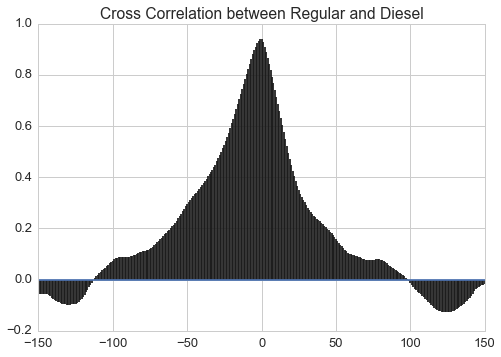

In [77]:
plt.xcorr(df_norm.Regular.astype(float), 
          df_norm.Diesel.astype(float),
          maxlags=150);
plt.title('Cross Correlation between Regular and Diesel')

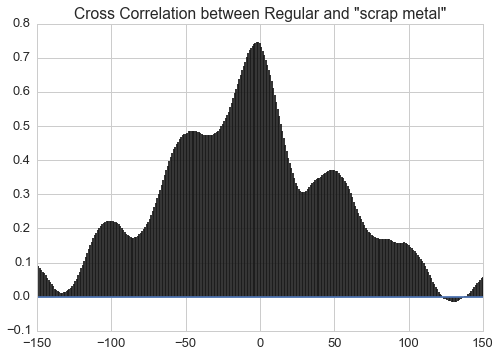

In [79]:
plt.xcorr(df_norm.Regular.astype(float), 
          df_norm['scrap metal'].astype(float),
          maxlags=150);
plt.title('Cross Correlation between Regular and "scrap metal"')

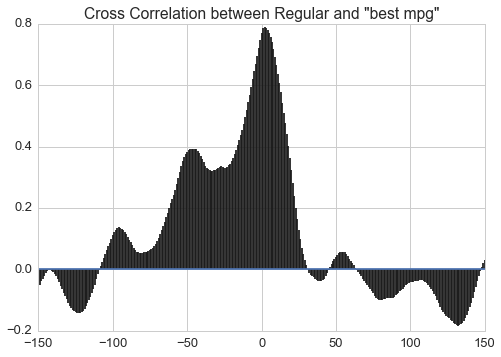

In [80]:
plt.xcorr(df_norm.Regular.astype(float), 
          df_norm['best mpg'].astype(float),
          maxlags=150);
plt.title('Cross Correlation between Regular and "best mpg"')

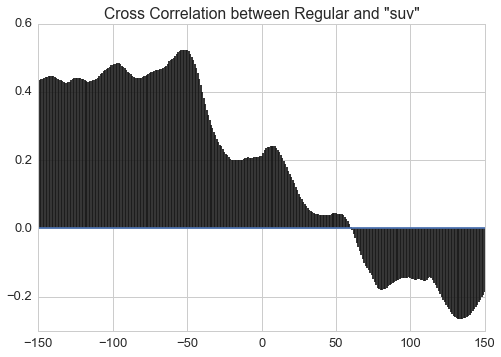

In [81]:
plt.xcorr(df_norm.Regular.astype(float), 
          df_norm.suv.astype(float),
          maxlags=150);
plt.title('Cross Correlation between Regular and "suv"')

#4 (g)

Read the figure above and answer: which time series has the highest correlation with regular gasoline price? Which ones have the second and third highest correlation? Can you explain this intuitively?

Scrap metal has the highest correlation with regular gasoline price which can be seen on the graph because the values barely ever dip below 0 on the y-axis. Diesel and Regular have the second highest, and best mpg and Regular have the third highest correlation.

I cannot explain why scrap metal and regular price have the highest correlation.

#Question 5: Moving Average Plot

Visualize the (original unnormalized) regular gasoline price between 2004 and 2015, together with its 20-, 50-, and 100-day MA curves. You should obtain a figure similar to the one shown below. Hint: use pd.rolling_mean().

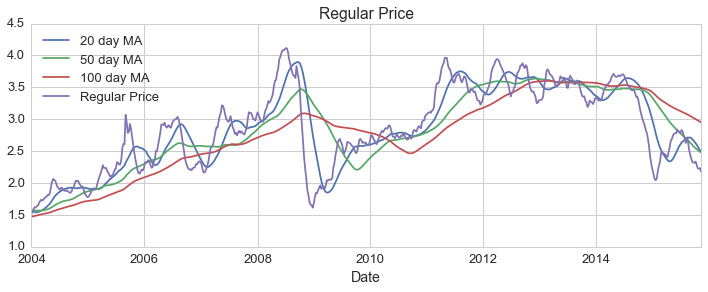

In [85]:
# Plot the prices with rolling means
windows = [20,50,100]
cols = [pd.rolling_mean(ts_regular, w) for w in windows]
df_reg_ma = pd.DataFrame(cols + [ts_regular]).T
df_reg_ma.columns = ['%d day MA'%w for w in windows] + ['Regular Price']

fig, ax = plt.subplots(figsize=(12,4))
df_reg_ma['2004':'2015'].plot(ax=ax)
plt.title('Regular Price')